<a href="https://colab.research.google.com/github/Nunez350/DataScienceAndAnalytics/blob/main/Logistic_Regression/Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.8/917.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatib

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets

In [ ]:
df = pd.read_csv('loans.csv', encoding='ISO-8859-1')

In [ ]:
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [ ]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [ ]:
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      9516 non-null   int64  
 1   installment  9516 non-null   int64  
 2   log_income   9516 non-null   float64
 3   fico_score   9516 non-null   int64  
 4   rev_balance  9516 non-null   float64
 5   inquiries    9516 non-null   int64  
 6   records      9516 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 520.5 KB


(   default  installment  log_income  fico_score  rev_balance  inquiries  \
 0        0          829        4.93         737        28.85          0   
 1        0          228        4.81         707        33.62          0   
 2        0          367        4.51         682         3.51          1   
 3        0          162        4.93         712        33.67          1   
 4        0          103        4.91         667         4.74          0   
 
    records  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,
 None,
            default  installment   log_income   fico_score  rev_balance  \
 count  9516.000000  9516.000000  9516.000000  9516.000000  9516.000000   
 mean      0.159836   320.142077     4.748656   710.841950    16.988948   
 std       0.366473   207.066550     0.265017    37.956246    33.721352   
 min       0.000000    16.000000     3.280000   612.000000     0.000000   
 25%       0.000000   164.000000     4.590000   682.000000     3.270000   


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      34 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.062 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
# fig.suptitle('Distribution of Key Loan Variables')

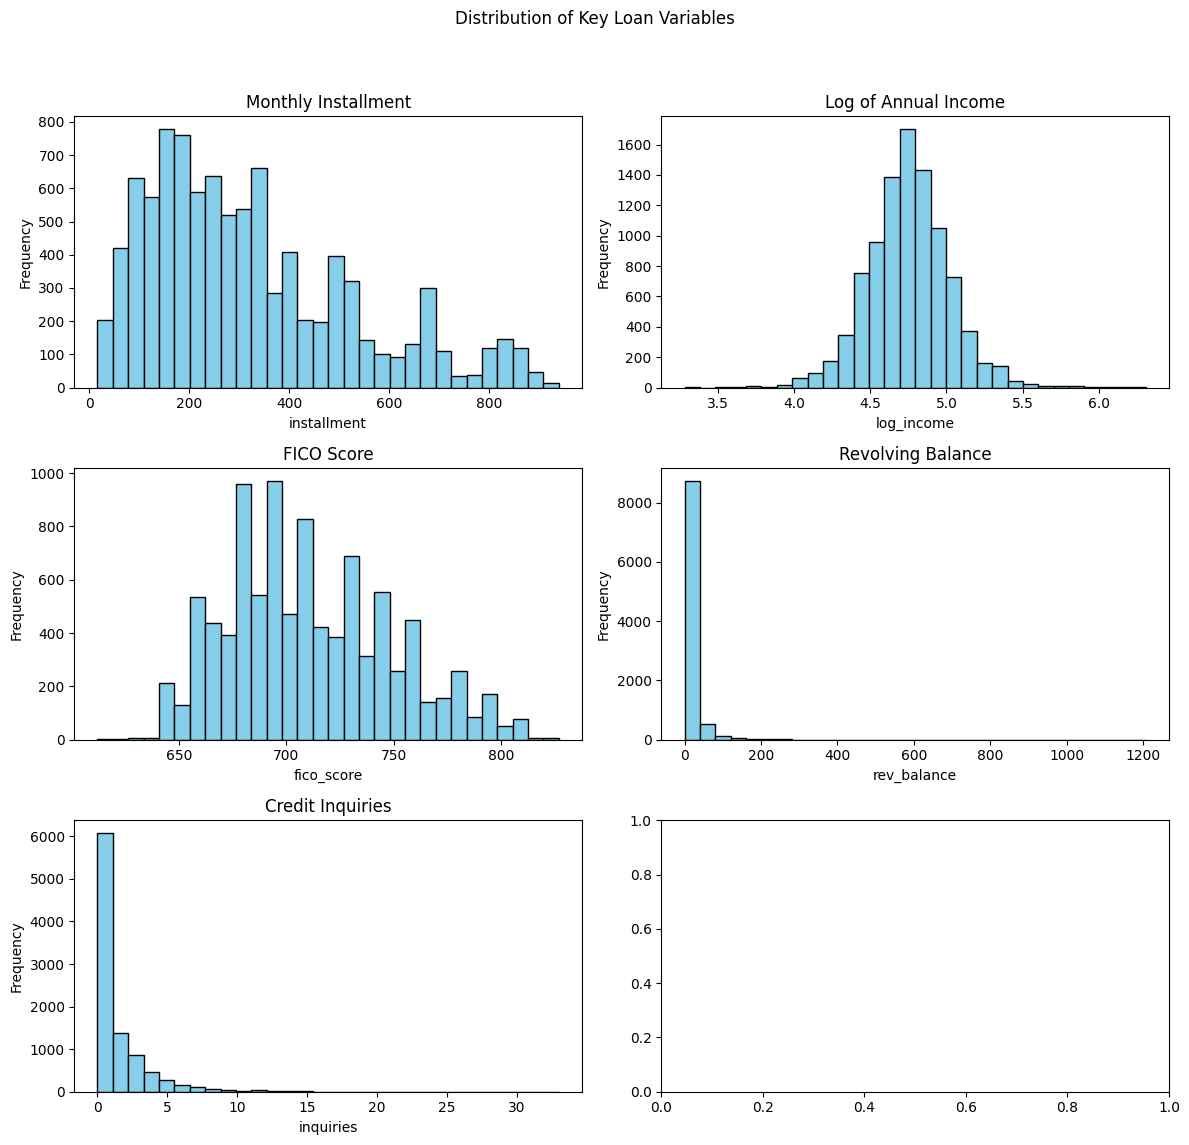

In [ ]:
import matplotlib.pyplot as plt

# Creating histograms for several key variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Key Loan Variables')

# Plot for each variable
variables = ['installment', 'log_income', 'fico_score', 'rev_balance', 'inquiries']
titles = ['Monthly Installment', 'Log of Annual Income', 'FICO Score', 'Revolving Balance', 'Credit Inquiries']

for ax, var, title in zip(axes.flatten(), variables, titles):
    ax.hist(loans_data_updated[var], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:

for ax, var, title in zip(axes.flatten(), variables, titles):
    ax.hist(loans_data_updated[var], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

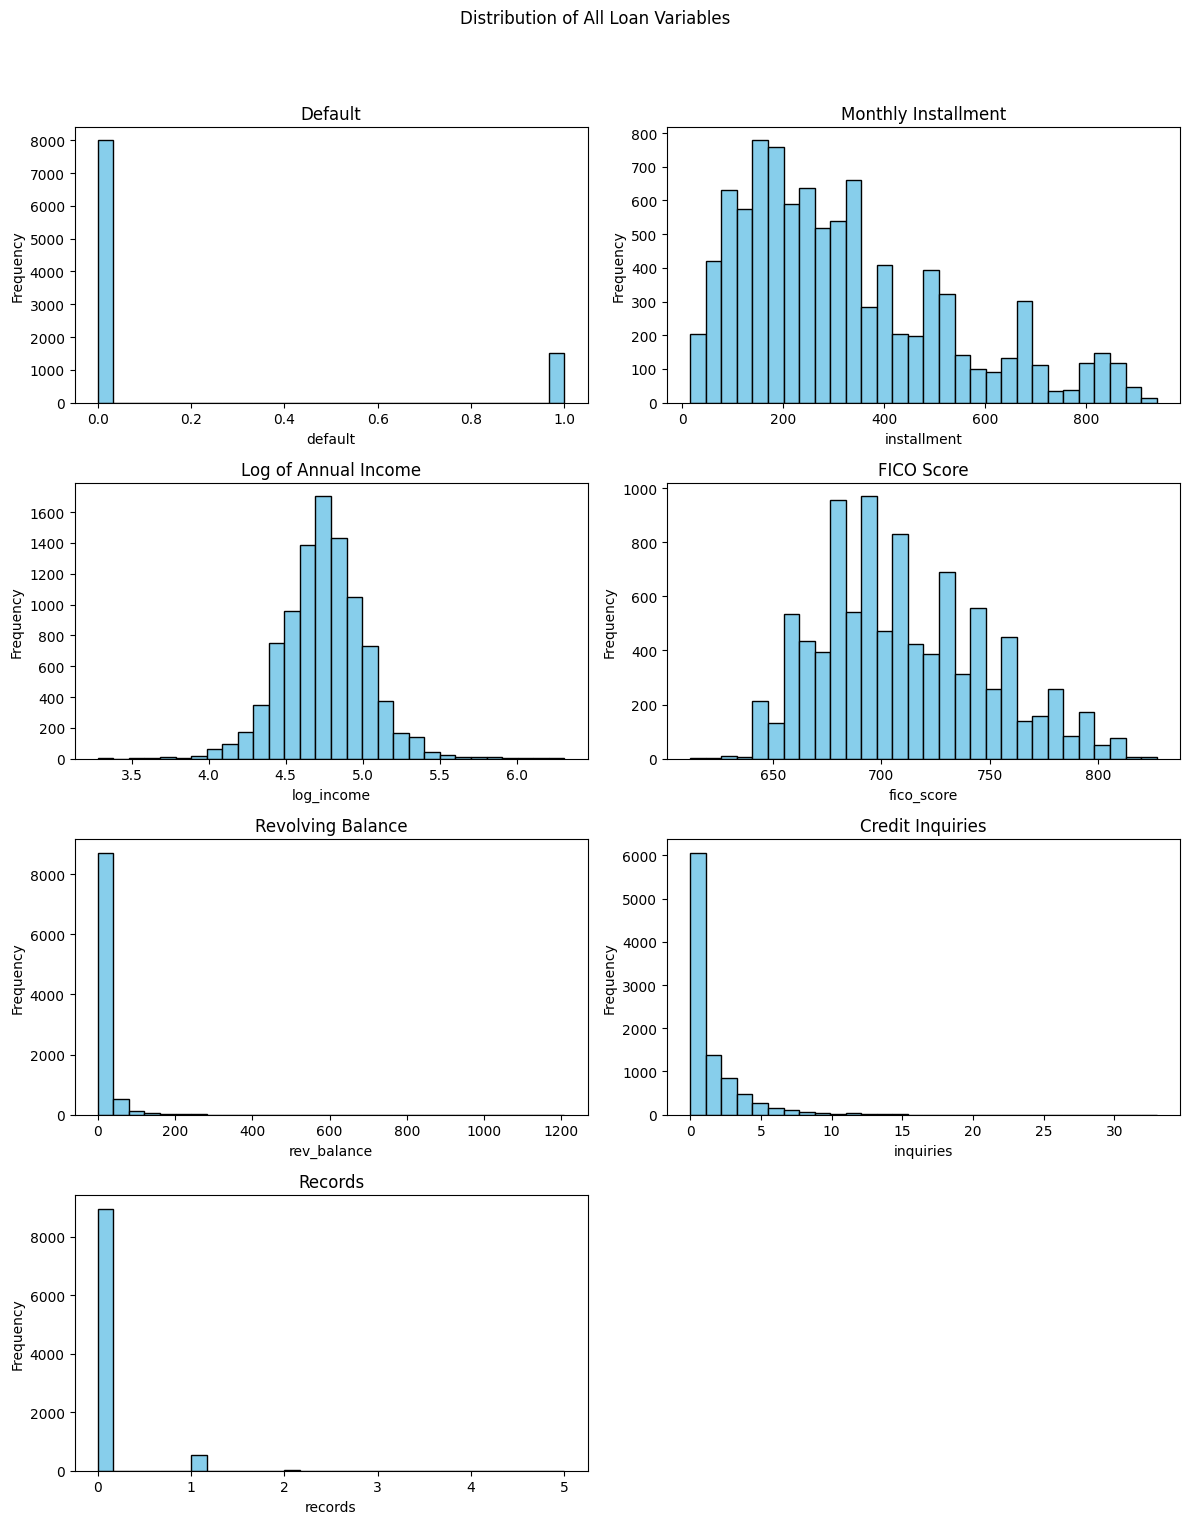

In [ ]:
import matplotlib.pyplot as plt

# Load the dataset (assuming it's loaded into a DataFrame named `loans_data_updated`)
# Creating histograms for all variables in the dataset
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Adjusted for 7 histograms + 1 empty subplot
fig.suptitle('Distribution of All Loan Variables')

# List of all columns in the dataset
variables = loans_data_updated.columns
titles = ['Default', 'Monthly Installment', 'Log of Annual Income', 'FICO Score', 'Revolving Balance', 'Credit Inquiries', 'Records']

for ax, var, title in zip(axes.flatten(), variables, titles):
    ax.hist(loans_data_updated[var], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Since we have an uneven number of plots (7), we can hide the last subplot if unnecessary
axes[-1, -1].axis('off')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
